In [70]:
import pandas as pd

df = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv")

df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [71]:
df.info()

df.describe(include='all')

df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [72]:
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df["country"].fillna("Unknown", inplace=True)

df_cleaned = df.dropna(subset=["director", "cast"])

df_cleaned.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          1
duration        3
listed_in       0
description     0
dtype: int64

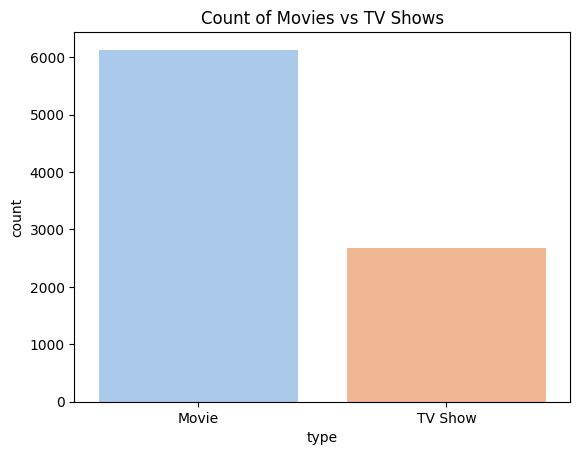

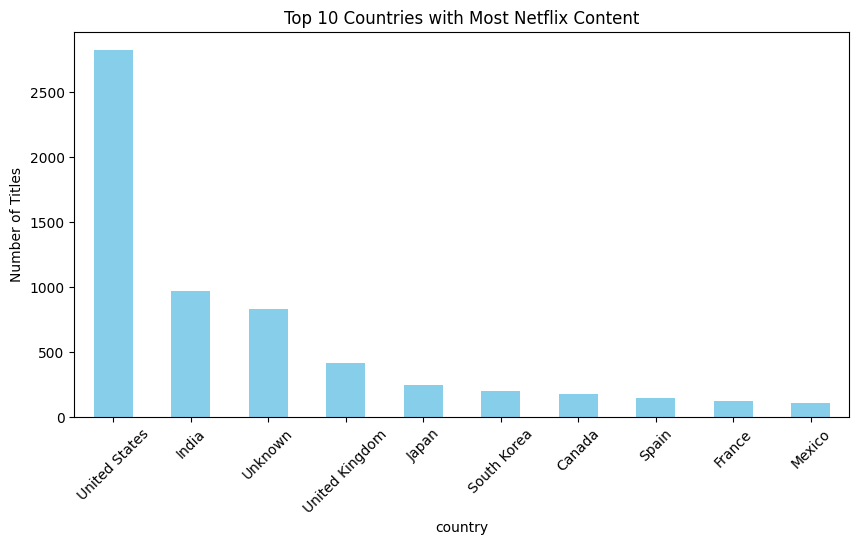

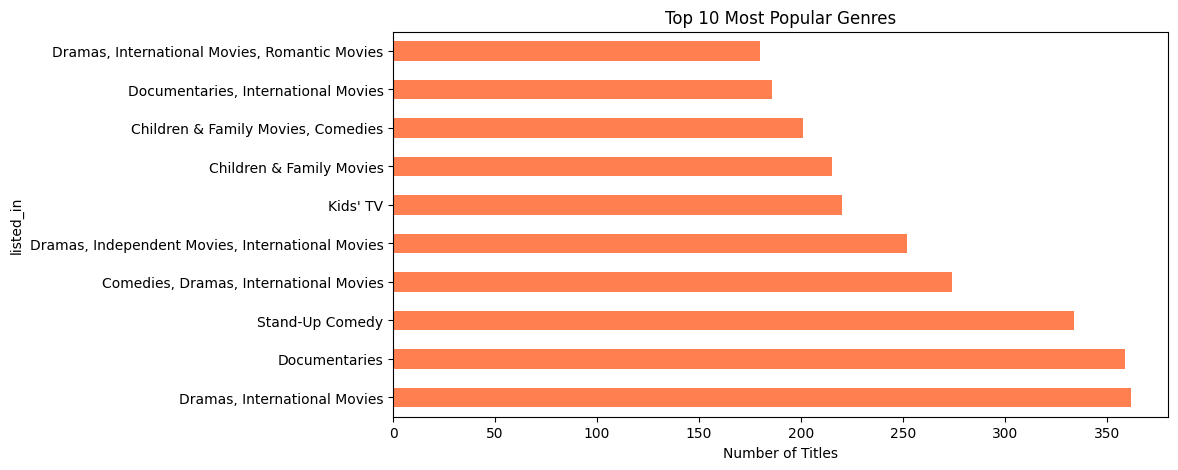

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df["type"], palette="pastel")
plt.title("Count of Movies vs TV Shows")
plt.show()

plt.figure(figsize=(10, 5))
df["country"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries with Most Netflix Content")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
df["listed_in"].value_counts().head(10).plot(kind="barh", color="coral")
plt.title("Top 10 Most Popular Genres")
plt.xlabel("Number of Titles")
plt.show()


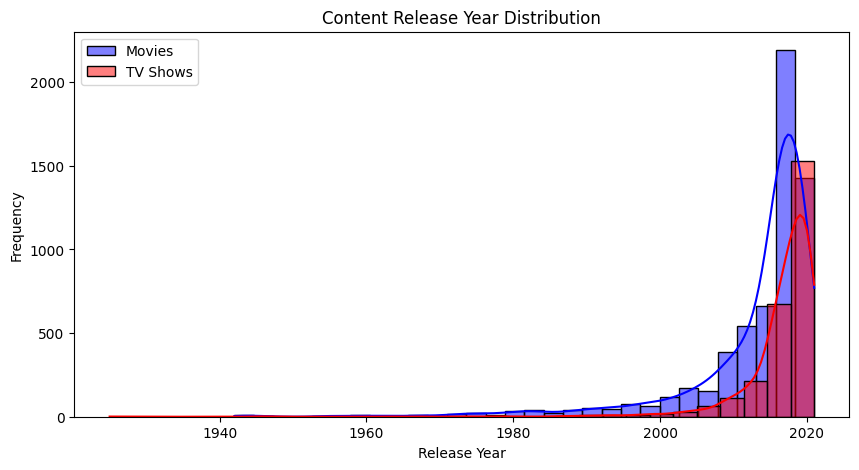

In [74]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df["type"] == "Movie"]["release_year"], bins=30, kde=True, color="blue", label="Movies")
sns.histplot(df[df["type"] == "TV Show"]["release_year"], bins=30, kde=True, color="red", label="TV Shows")
plt.title("Content Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.legend()
plt.show()



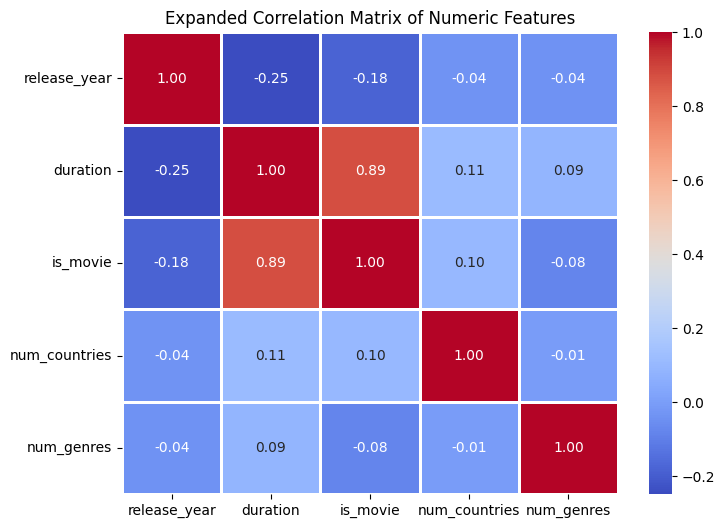

In [75]:
df["duration"] = df["duration"].astype(str).str.extract(r'(\d+)')[0]  
df["duration"] = pd.to_numeric(df["duration"], errors="coerce") 

df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")

df["is_movie"] = (df["type"] == "Movie").astype(int)

df["num_countries"] = df["country"].astype(str).apply(lambda x: len(x.split(",")) if pd.notna(x) else 0)

df["num_genres"] = df["listed_in"].astype(str).apply(lambda x: len(x.split(",")) if pd.notna(x) else 0)

df["duration"].fillna(df["duration"].median(), inplace=True)
df["release_year"].fillna(df["release_year"].median(), inplace=True)

corr_matrix = df[["release_year", "duration", "is_movie", "num_countries", "num_genres"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Expanded Correlation Matrix of Numeric Features")
plt.show()
